# Tutorial 01 - MLP com SKLearn

<h3>Nesse tutorial vocês irão implementar um modelo de redes neurais denominado Perceptron Multi Camadas aplicado à coleção diabetes disponível no <a href="https://www.kaggle.com/uciml/pima-indians-diabetes-database">Kaggle</a> utilizando o <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html">Scikit-Learn</a></h3>

<h4>Passo 1: Realize o carregamento do dataset e exiba suas dimensões e descrição</h4>

In [1]:
import pandas as pd

df_diabetes = pd.read_csv('diabetes.csv')
print(df_diabetes.shape)
df_diabetes.describe().transpose()

(768, 9)


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<h4>Passos 2 e 3: Aplique nos atributos preditores, criando dois novos Pandas Data Frames, padronização e normalização</h4>

In [2]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetes'],
      dtype='object')

In [3]:
target_column = ['Diabetes']
predictors = list(set(list(df_diabetes.columns))-set(target_column))
print(predictors)

['SkinThickness', 'Insulin', 'Age', 'Glucose', 'Pregnancies', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']


In [4]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()

df_standard = df_diabetes.copy()

df_standard[predictors] = transformer.fit_transform(df_diabetes[predictors])
df_standard.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,-6.476301e-17,1.000652,-1.141852,-0.844885,-0.250952,0.639947,3.906578
Glucose,768.0,-9.251859e-18,1.000652,-3.783654,-0.685236,-0.121888,0.605771,2.444478
BloodPressure,768.0,1.503427e-17,1.000652,-3.572597,-0.367337,0.149641,0.563223,2.734528
SkinThickness,768.0,1.006140e-16,1.000652,-1.288212,-1.288212,0.154533,0.719086,4.921866
Insulin,768.0,-3.006854e-17,1.000652,-0.692891,-0.692891,-0.428062,0.412008,6.652839
BMI,768.0,2.590520e-16,1.000652,-4.060474,-0.595578,0.000942,0.584771,4.455807
DiabetesPedigreeFunction,768.0,2.451743e-16,1.000652,-1.189553,-0.688969,-0.300128,0.466227,5.883565
Age,768.0,1.931325e-16,1.000652,-1.041549,-0.786286,-0.360847,0.660206,4.063716
Diabetes,768.0,3.489583e-01,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


<h4>Passo 4: Separe os Data Frames em conjuntos de treino e teste</h4>

In [5]:
from sklearn.model_selection import train_test_split

X_std = df_standard[predictors].values
y_std = df_standard[target_column].values

X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y_std, test_size=0.30, random_state=12)
print(X_train_std.shape)
print(X_test_std.shape)

(537, 8)
(231, 8)


<h4>Passo 5: Crie o modelo de MLP<br/>
Iremos utilizar o MLPClassifier do pacote sklearn.neural_network</h4>
<p>Definição de Parâmetros</p>
<ul>
    <li>
        <p><strong>hidden_layer_sizes</strong>: É uma tupla onde cada elemento representa uma camada oculta. Os valores representam os números de neurônios utilizados em cada uma das camadas. Geralmente utiliza-se a forma densa, ou seja, um neurônio de camada oculta por um neurônio de entrada</p>
    </li>
    <li>
        <p><strong>activation</strong>: Aqui você irá definir a função de ativação, no Scikit-Learn há as seguintes opções</p>
        <ol>
            <li>indentity: f(x) = x</li>
            <li>logistic: f(x) = 1 / (1 + exp(-x))</li>
            <li>tanh: f(x) = tanh(x)</li>
            <li>relu: f(x) = max(0, x)</li>
        </ol>
    </li>
    <li>
        <p><strong>solver</strong>: Esse parâmetro indica qual a função utilizada para otimizar os pesos da rede. As mais comuns são <i>sgd</i> e <i>adam</i></p>
    </li>
    <li>
        <p><strong>max_iter</strong>: Indica a quantidade de iterações que o modelo irá aplicar o algoritmo Backpropagation com o objetivo de alcançar a convergência.</p>
    </li>
    <li>
        <p><strong>random_sate</strong>: Um número indicado para que o modelo possa ser reproduzível.</p>
    </li>
</ul>

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

mlp_std = MLPClassifier(hidden_layer_sizes=(8,8,8),
                        activation='relu',
                        solver='adam',
                        max_iter=500,
                        random_state=40                        
                       )
mlp_std.fit(X_train_std, y_train_std)
predict_test_std = mlp_std.predict(X_test_std)

print()
print(classification_report(y_test_std, predict_test_std))
print()

C:\Users\hroat\AppData\Local\conda\conda\envs\R_Studio\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



              precision    recall  f1-score   support

           0       0.80      0.85      0.82       147
           1       0.70      0.62      0.66        84

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.76      0.77      0.76       231




C:\Users\hroat\AppData\Local\conda\conda\envs\R_Studio\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<h4>Passo 6: Exiba um gráfico com a matriz de confusão dos valores preditos</h4>

C:\Users\hroat\AppData\Local\conda\conda\envs\R_Studio\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hroat\AppData\Local\conda\conda\envs\R_Studio\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hroat\AppData\Local\conda\conda\envs\R_Studio\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confus

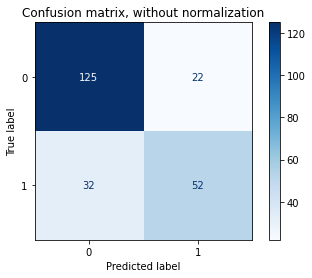

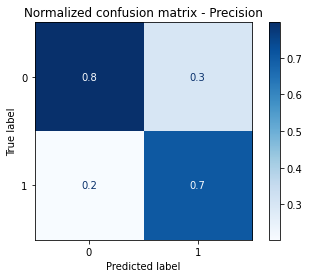

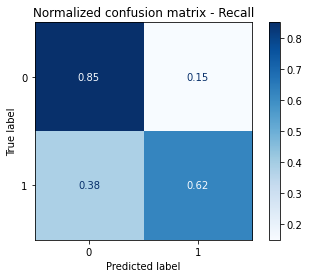

In [7]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix - Precision", 'pred'),
                 ("Normalized confusion matrix - Recall", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(mlp_std, X_test_std, y_test_std,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    #print(title)
    #print(disp.confusion_matrix)

plt.show()